<a href="https://colab.research.google.com/github/AnkammaMaddineni/Maddineni_INFO5502_Summer2022/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (08/02/2022 11:59'AM' - 08/05/2022 11:59PM, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Q1 Task Decription (50 Points)

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/suthapalliuday/INFO5502-Summer2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [1]:
### You code here:

import pandas as pd
import numpy as np
import csv as csv
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

train_df = pd.read_csv('https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_06/train_luc.csv', header=0)

print("\nNumber of samples:",train_df.shape[0],"and number of features:",train_df.shape[1],"\n")

train_df.head()


Number of samples: 9174 and number of features: 12 



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:

train_df['datetime']=pd.to_datetime(train_df.datetime)
train_df['hour'] = train_df['datetime'].dt.hour
train_df['day'] = train_df['datetime'].dt.day
train_df['month'] = train_df['datetime'].dt.month
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


Text(0.5, 1.0, 'Measured hourly bike usage over 2 years')

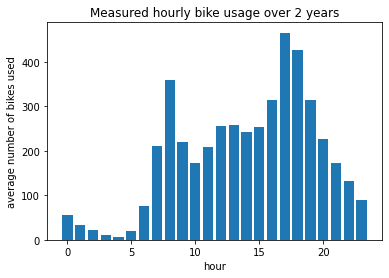

In [3]:
hours = np.unique(train_df['hour'])
hours_mean = {}
for h in hours:
    temp_df = train_df.loc[train_df['hour'] == h]
    hours_mean[h] = temp_df['count'].mean()
# Creating visualization for better understanding of dataset
plt.bar(hours,[hours_mean[h] for h in hours])
plt.xlabel("hour")
plt.ylabel("average number of bikes used")
plt.title("Measured hourly bike usage over 2 years")

Text(0.5, 1.0, 'Measured monthly bike usage over 2 years')

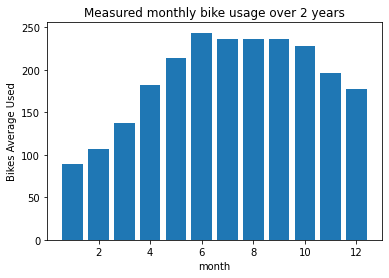

In [4]:
month = np.unique(train_df['month'])
month_mean = {}
for h in month:
    te_df1 = train_df.loc[train_df['month'] == h]
    month_mean[h] = te_df1['count'].mean()
plt.bar(month,[month_mean[h] for h in month])
plt.xlabel("month")
plt.ylabel("Bikes Average Used")
plt.title("Measured monthly bike usage over 2 years")

In [5]:
cols = ['hour', 'day', 'month'] 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 1)

print("columns selected for later:",cols)
print(model)

columns selected for later: ['hour', 'day', 'month']
RandomForestRegressor(n_estimators=1)


In [6]:
#kfold cross validation

from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=None)
for train, test in kfold.split(train_df):
    print('train: %s, test: %s' % (train, test))
print("Number of samples in new train subset = ", len(train))
print("Number of samples in new test subset = ", len(test))


train: [   0    1    2 ... 9171 9172 9173], test: [   4    5    9 ... 9159 9162 9163]
train: [   0    1    2 ... 9169 9171 9172], test: [   8   20   23 ... 9167 9170 9173]
train: [   0    1    2 ... 9170 9172 9173], test: [   3   13   15 ... 9161 9169 9171]
train: [   3    4    5 ... 9170 9171 9173], test: [   0    1    2 ... 9164 9165 9172]
train: [   0    1    2 ... 9171 9172 9173], test: [   6    7   10 ... 9146 9156 9168]
Number of samples in new train subset =  7340
Number of samples in new test subset =  1834


In [7]:
n = len(train_df)
training_size = 0.5
indices = np.array(range(n)) 
from numpy.random import shuffle
shuffle(indices)
split_point = int(n*training_size)
mytrain_i = indices[0:split_point]
mytest_i = indices[split_point:]

new_train_df = train_df.iloc[mytrain_i]
new_test_df = train_df.iloc[mytest_i]

print("samples in the new training subset:",len(new_train_df))
print("samples in the new test subset:",len(new_test_df))

samples in the new training subset: 4587
samples in the new test subset: 4587


In [8]:
model.fit(new_train_df[cols], new_train_df['count'])

pred_count = model.predict(new_test_df[cols])

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(new_test_df['count'],pred_count))
print("RMS error:",rms)

RMS error: 161.00513867180075


In [9]:
test_df = pd.read_csv('https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/lab_assignment_06/test_luc.csv', header=0)
print("\nTotal number of samples:",test_df.shape[0] ,"and total number of features:",test_df.shape[1],"\n")

test_df['datetime']=pd.to_datetime(test_df.datetime)
test_df['hour'] = test_df['datetime'].dt.hour
test_df['day'] = test_df['datetime'].dt.day
test_df['month'] = test_df['datetime'].dt.month
#check whether the test dataframe has new coloumns(hour, day, month)
test_df.head()



Total number of samples: 1712 and total number of features: 9 



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,month
0,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,0,17,1
1,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,17,1
2,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,2,17,1
3,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,3,17,1
4,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,4,17,1


In [10]:
model.fit( train_df[cols], train_df['count'])

pred_count = model.predict(test_df[cols])

test_df['count'] = pred_count

test_df = test_df[['datetime','count']].to_csv('my_prediction.csv', 
    index=False, header=True)
print("Prediction complete. Saved as my_prediction.csv")

Prediction complete. Saved as my_prediction.csv


 Question 2 (20 points) Build a regession model to predict the change in price of the stock overtime. It can either be linear regression or non-linear regression. You can download the dataset from here: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/portfolio_data.csv. The implementation of the LSTM on this same dataset was posted here as an reference: https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook

 ### Your code

In [11]:
### You code here:

import matplotlib.pyplot as plt
import pandas as pd

dataframe = pd.read_csv('https://raw.githubusercontent.com/suthapalliuday/INFO5502-Summer2022/main/datasets/portfolio_data.csv')
dataframe.head(5)


,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [12]:
x = dataframe.drop(['Date', 'BTC'], axis = 1)
y = dataframe['BTC']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
atrain, atest, btrain, btest = train_test_split(x, y, test_size = 0.1, random_state = 1)
lr = LinearRegression()
lr.fit(atrain, btrain)
bpred = lr.predict(atest)
print("RMSE score = ",np.sqrt(mean_squared_error(btest, bpred)))
print("R2 Score = ", r2_score(btest, bpred))

RMSE score =  1599.2156424494283
R2 Score =  0.6608016039420654


In [13]:
from sklearn.tree import DecisionTreeRegressor

atrain, btest, btrain, btest = train_test_split(x, y, test_size = 0.1, random_state = 1)
df_reg = DecisionTreeRegressor()
df_reg.fit(atrain, btrain)
ypred = df_reg.predict(atest)
print("RMSE score = ",np.sqrt(mean_squared_error(btest, bpred)))
print("R2 Score = ", r2_score(btest, bpred))

RMSE score =  1599.2156424494283
R2 Score =  0.6608016039420654


In [14]:
from sklearn.ensemble import RandomForestRegressor

atrain, atest, btrain, btest = train_test_split(x, y, test_size = 0.1, random_state = 1)
rtreg = RandomForestRegressor(random_state=321)
rtreg.fit(atrain, btrain)
rtregpred = rtreg.predict(atest)
print("RMSE score = ",np.sqrt(mean_squared_error(btest, rtregpred)))
print("R2 Score = ", r2_score(btest, rtregpred))

RMSE score =  520.8055425858364
R2 Score =  0.9640258180629994
